<a href="https://colab.research.google.com/github/solaripynb/SolarEnergyForecasting/blob/main/SolarEnergyForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Solar Energy Forecasting Model:

**Note to Stakeholders and Interested Parties:**

This Notebook provides a streamlined demonstration of the Base Solar Energy Forecasting Model. Essential aspects of the code, including complex feature engineering, sophisticated model-building techniques, and comprehensive evaluation metrics, are either redacted or presented in a condensed form.

Should there be interest in the complete capabilities of this model, its advanced technical details, or discussion on customization to suit specific requirements, direct contact is encouraged.

For a detailed walkthrough and discussion regarding collaborative opportunities, please reach out via [LinkedIn](https://www.linkedin.com/in/sergiodavidescobar).

**Thank you for your interest, and I look forward to the possibility of working together to advance solar energy forecasting.**



# Data Preparation

In [1]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = 'dataset source: PVGIS-SARAH2'
df = pd.read_csv(file_path, parse_dates=True, index_col=0)

# Filter the data for the period from 2012 to end of 2020
df_filtered = df['2012-01-01':'2020-12-31']

# Initial Data Exploration: Check for missing values and data types
#... continue

df_filtered.head(), missing_values, data_types

(                       P  Gb(i)  Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int
 time                                                                  
 2012-01-01 00:10:00  0.0    0.0    0.0    0.0    0.0  7.13   1.10  0.0
 2012-01-01 01:10:00  0.0    0.0    0.0    0.0    0.0  6.95   1.10  0.0
 2012-01-01 02:10:00  0.0    0.0    0.0    0.0    0.0  7.29   1.03  0.0
 2012-01-01 03:10:00  0.0    0.0    0.0    0.0    0.0  7.51   0.90  0.0
 2012-01-01 04:10:00  0.0    0.0    0.0    0.0    0.0  7.20   0.97  0.0,
 P        0
 Gb(i)    0
 Gd(i)    0
 Gr(i)    0
 H_sun    0
 T2m      0
 WS10m    0
 Int      0
 dtype: int64,
 P        float64
 Gb(i)    float64
 Gd(i)    float64
 Gr(i)    float64
 H_sun    float64
 T2m      float64
 WS10m    float64
 Int      float64
 dtype: object)

# Feature Engineering

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Lagged Features
# Temporal Features
# Interaction Terms
# Seasonal Decomposition
# Rolling Window Statistics
# Cyclical Features
#... continue

In [3]:
df_filtered

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int,P_lag_1h,P_lag_3h,...,day_of_week_sin,day_of_week_cos,month_sin,month_cos,P_hist_1d,P_hist_2d,P_hist_3d,P_3h_EMA,P_4h_EMA,P_5h_EMA
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,7.13,1.10,0.0,NaN,NaN,...,-0.781831,0.623490,0.0,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
2012-01-01 01:10:00,0.0,0.0,0.0,0.0,0.0,6.95,1.10,0.0,0.0,NaN,...,-0.781831,0.623490,0.0,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
2012-01-01 02:10:00,0.0,0.0,0.0,0.0,0.0,7.29,1.03,0.0,0.0,NaN,...,-0.781831,0.623490,0.0,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
2012-01-01 03:10:00,0.0,0.0,0.0,0.0,0.0,7.51,0.90,0.0,0.0,0.00,...,-0.781831,0.623490,0.0,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
2012-01-01 04:10:00,0.0,0.0,0.0,0.0,0.0,7.20,0.97,0.0,0.0,0.00,...,-0.781831,0.623490,0.0,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:10:00,0.0,0.0,0.0,0.0,0.0,7.23,4.00,0.0,0.0,513.28,...,0.433884,-0.900969,-0.5,0.866025,0.0,0.0,0.0,61.620117,102.081296,133.970908
2020-12-31 20:10:00,0.0,0.0,0.0,0.0,0.0,7.24,4.14,0.0,0.0,0.00,...,0.433884,-0.900969,-0.5,0.866025,0.0,0.0,0.0,30.810059,61.248777,89.313939
2020-12-31 21:10:00,0.0,0.0,0.0,0.0,0.0,7.04,4.48,0.0,0.0,0.00,...,0.433884,-0.900969,-0.5,0.866025,0.0,0.0,0.0,15.405029,36.749266,59.542626


In [4]:
# Check for NaN values in the dataset
#... continue

In [5]:
total_nan

188

In [9]:
# Fill the remaining NaN values with zero
#... continue

remaining_nan_after_fill

<ipython-input-9-d3eb1fc7d635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


0

# Exploratory Data Analysis (EDA)

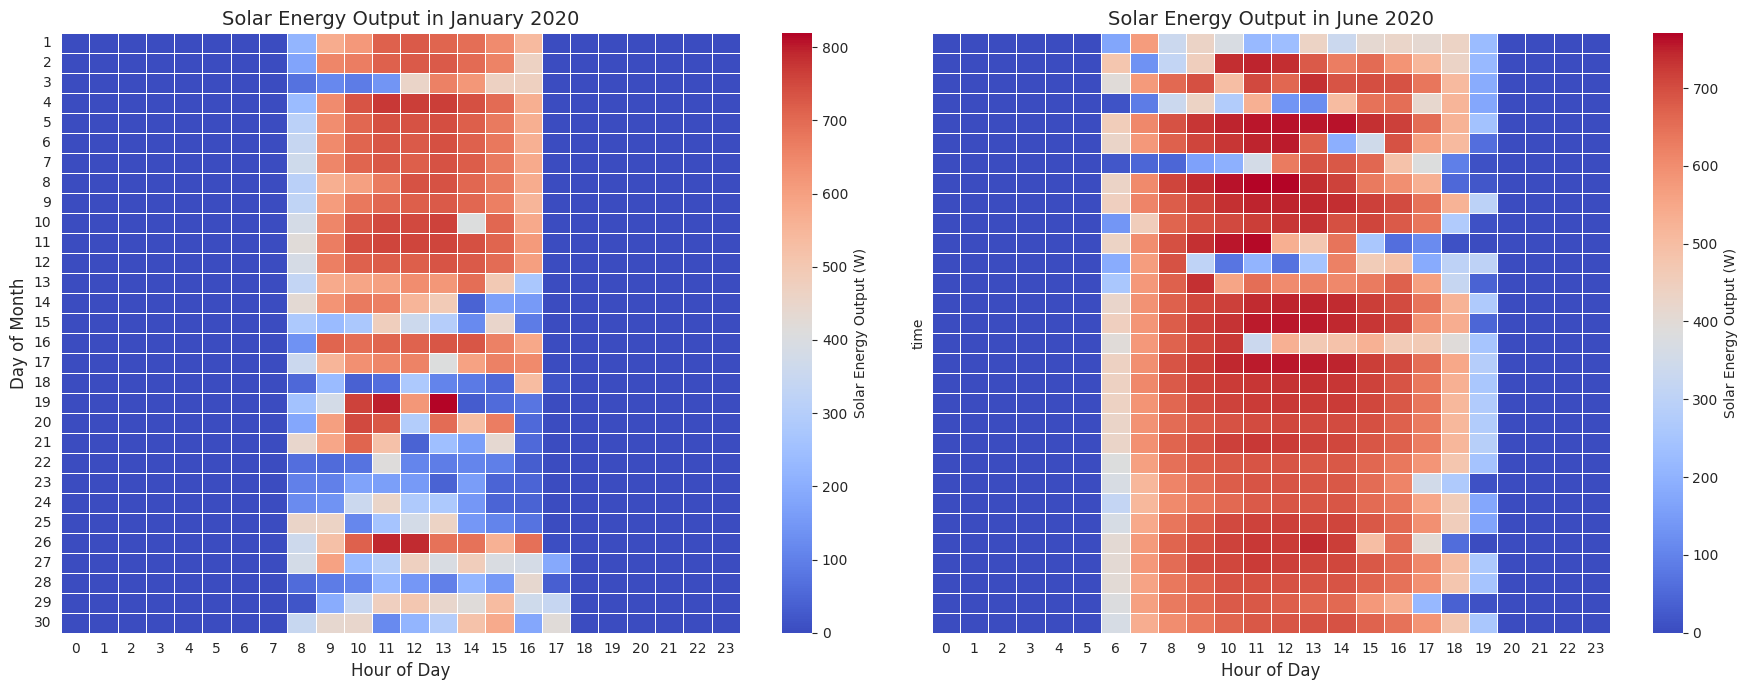

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for January and June
#... continue

# Create pivot tables for January and June
#... continue

# Show the plot
plt.show()

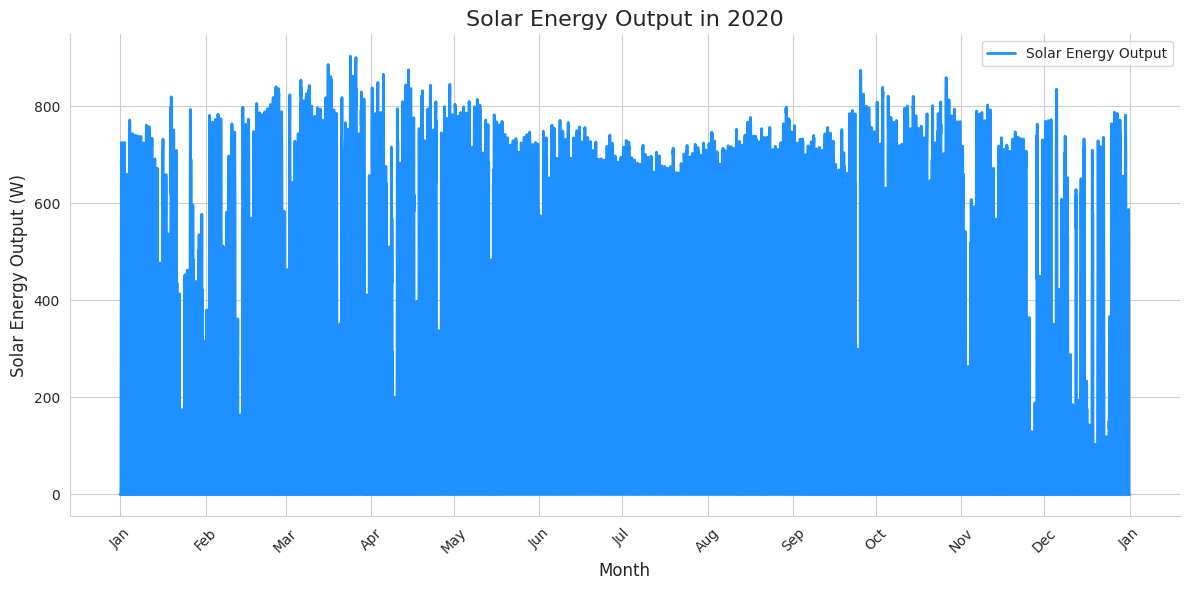

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Filter the DataFrame to include only data from 2020
#... continue

# Plotting the time-series data for 2020
#... continue

# Showing the plot
plt.show()

FileNotFoundError: ignored

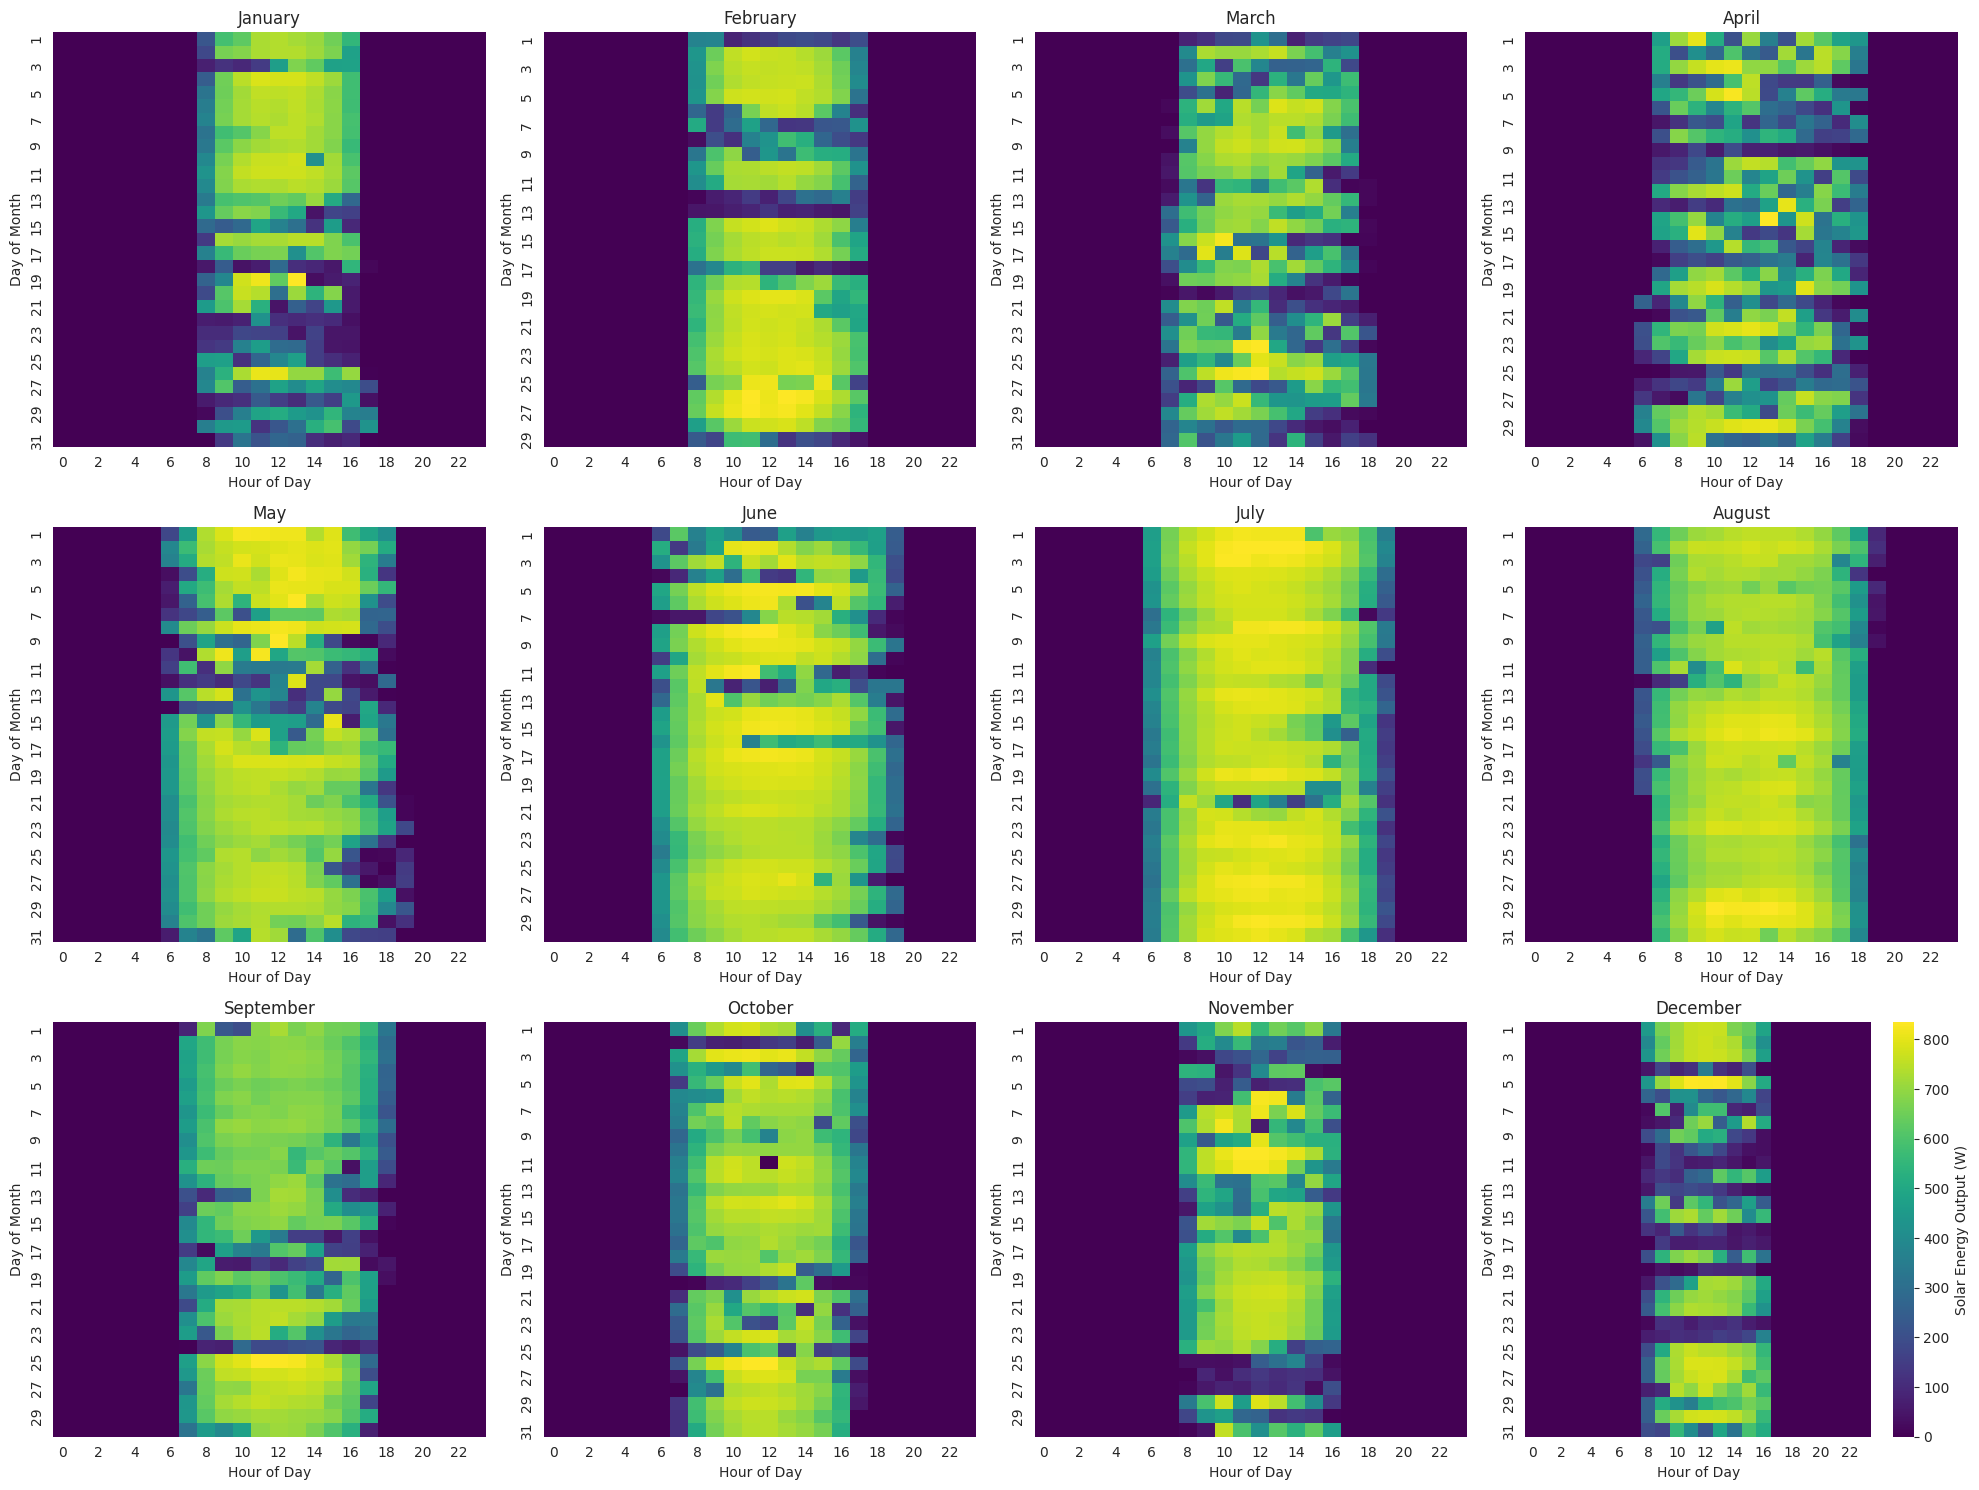

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Set up a 3x4 grid of subplots
#... continue

# Generate a pivot table and heatmap for each month
#... continue

# Show the plot
plt.show()

<ipython-input-19-bf1a0064134f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Quarter'] = df_2020.index.to_period('Q')


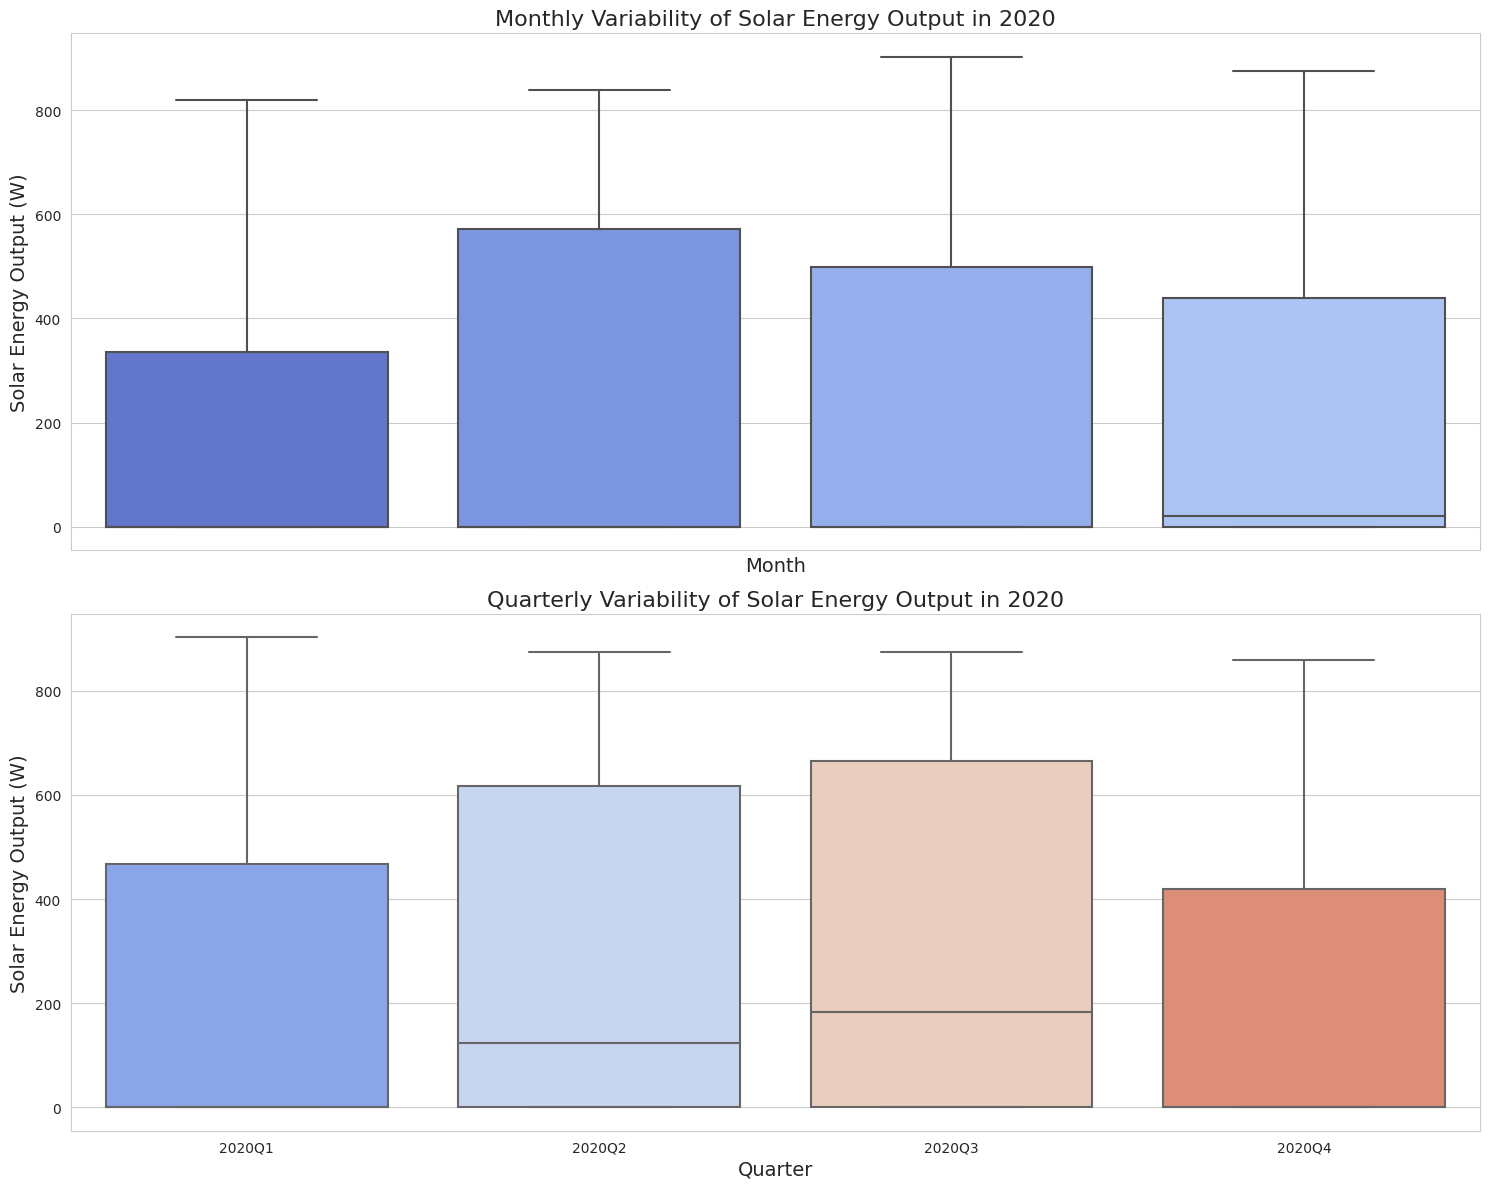

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set_style('whitegrid')

# Create a new figure and set of subplots
#... continue

# Boxplot for each month
#... continue

# Boxplot for each quarter
#... continue

# Show the plot
plt.show()

<ipython-input-21-0eade9d10804>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Cumulative_P'] = df_2020['P'].cumsum()


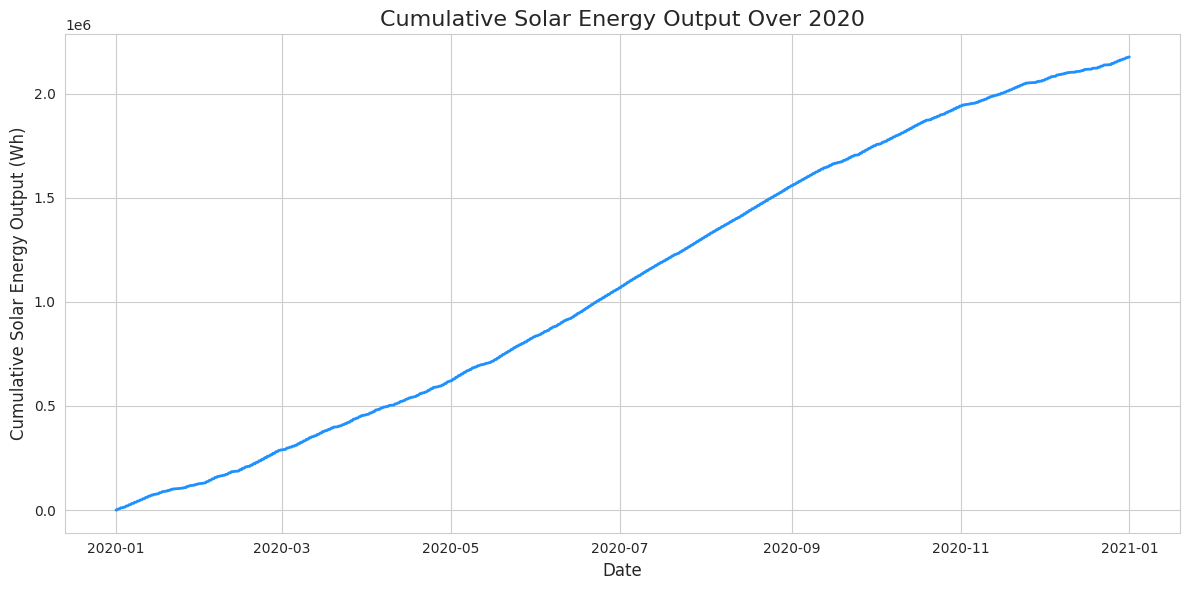

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the cumulative sum of solar energy output
#... continue

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the cumulative solar energy output
#... continue

# Show the plot
plt.show()

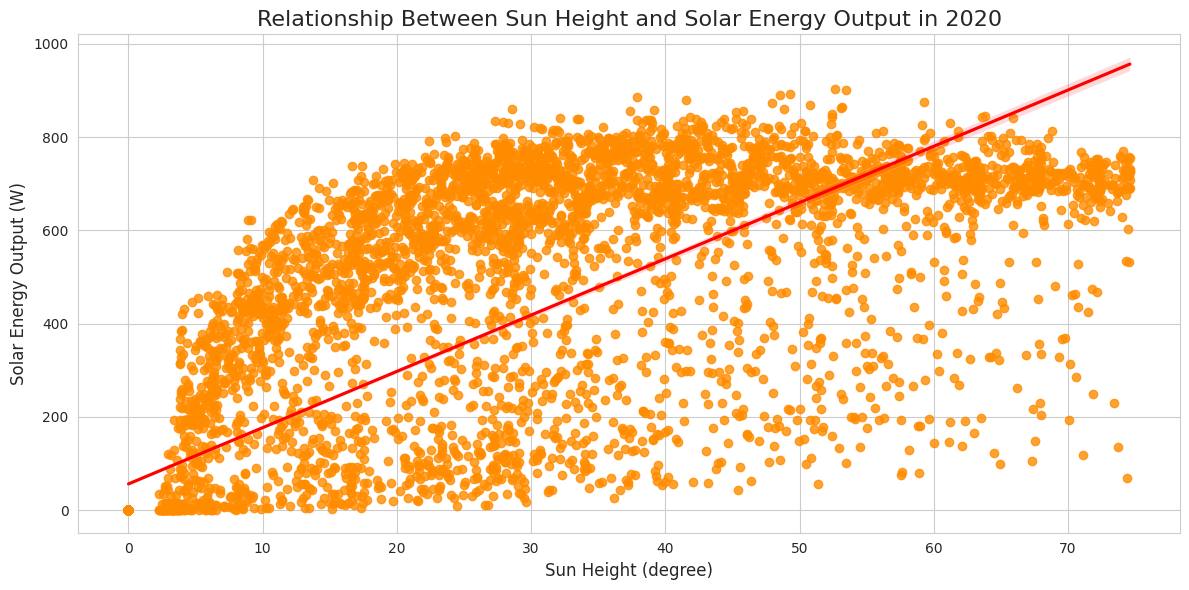

In [22]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot a scatter plot with a regression line
#... continue

# Show the plot
plt.show()

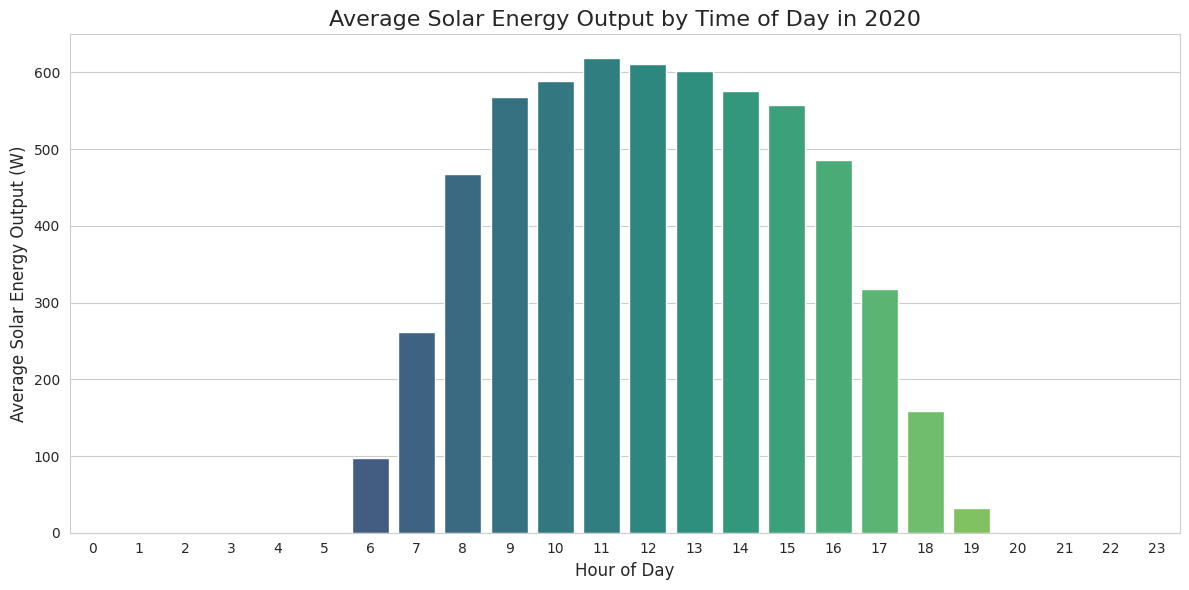

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by hour and calculate the mean
#... continue

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the bar plot
#... continue

# Show the plot
plt.show()

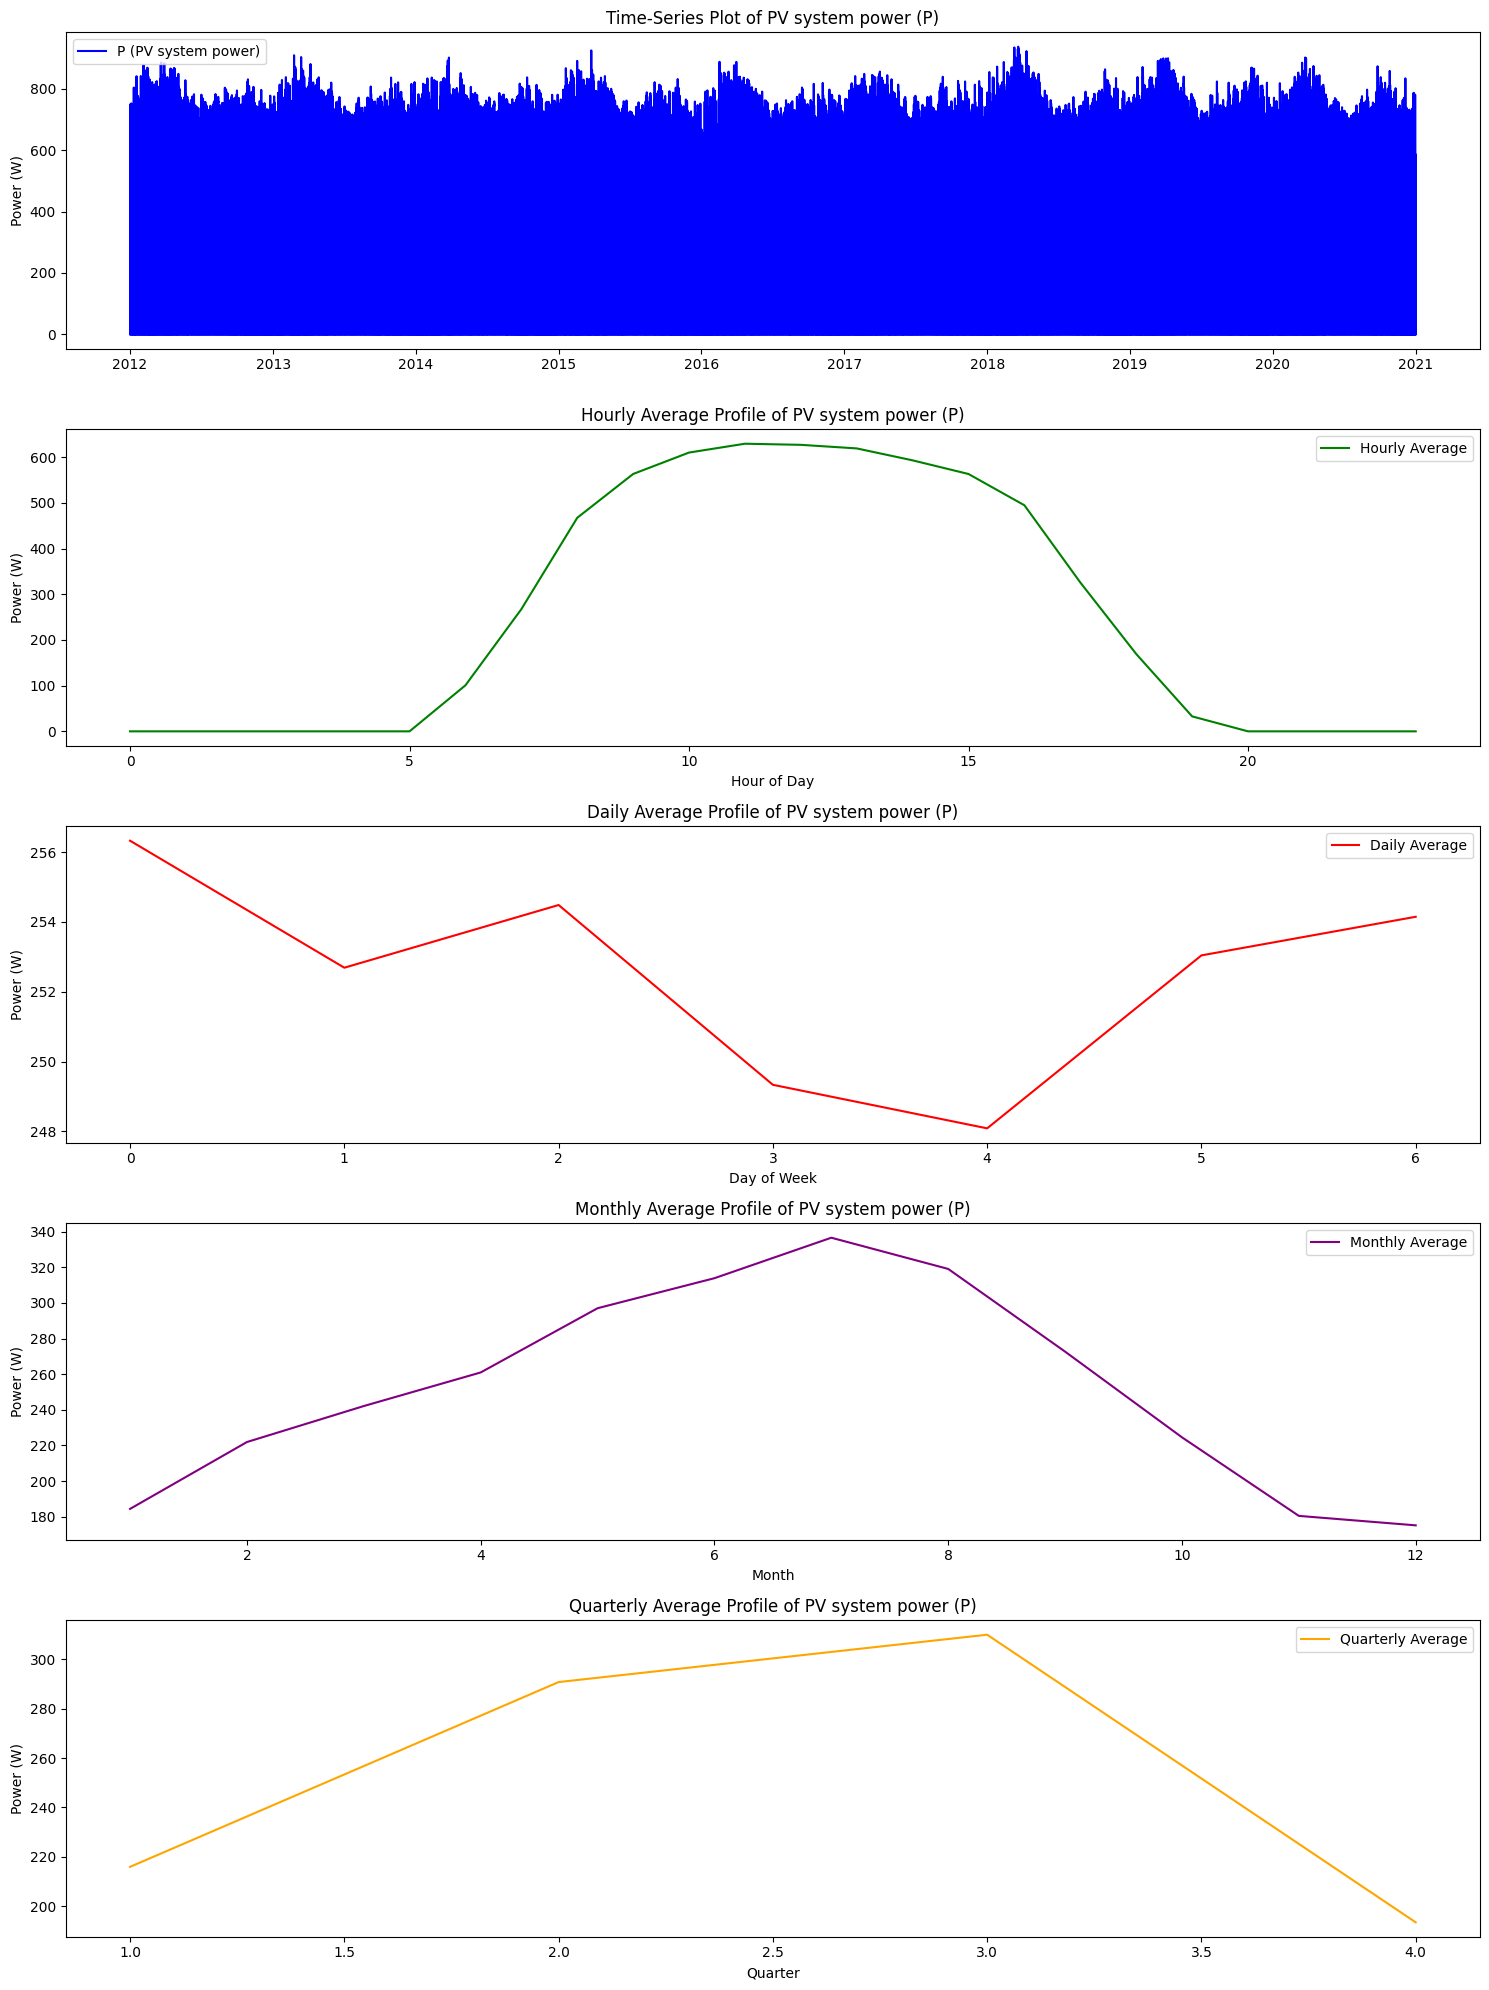

In [8]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, axs = plt.subplots(5, 1, figsize=(15, 20))

# Plot the PV system power to observe trends and patterns over the entire dataset
#... continue
# Aggregate and plot the average power profiles for different time resolutions
# Hourly profile
#... continue
# Daily profile
#... continue

# Monthly profile
#... continue

# Quarterly profile
#... continue

plt.show()

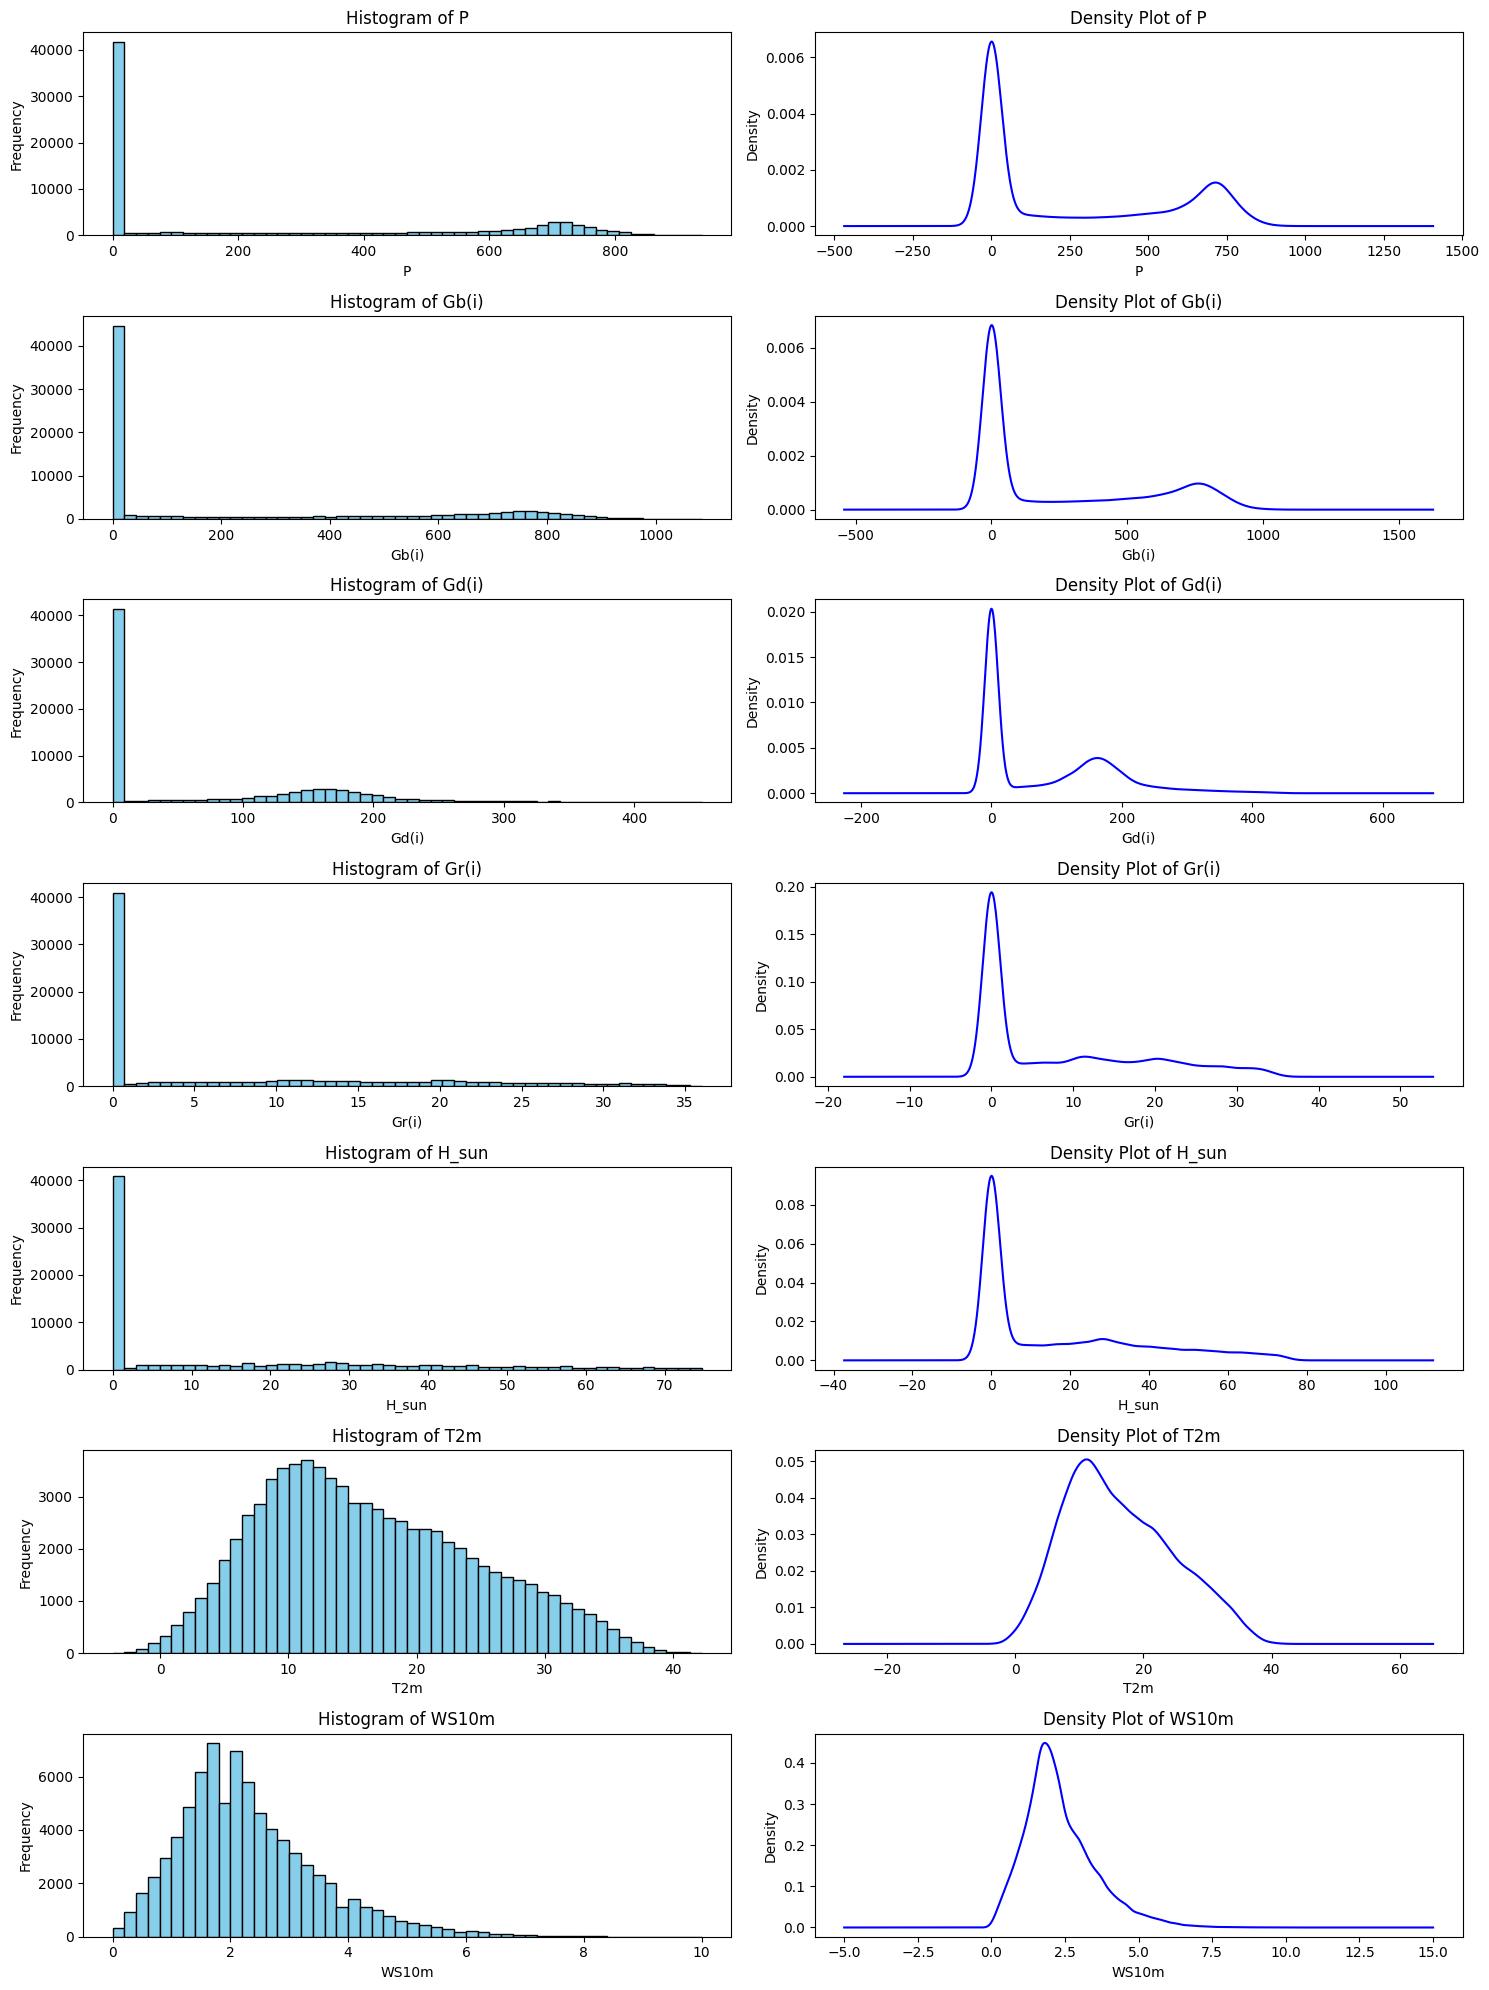

In [ ]:
# Variables for distribution analysis
variables = ['P', 'Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']

# Set up the figure and axis
#... continue

# Plot histograms and density plots for each variable
#... continue

plt.show()

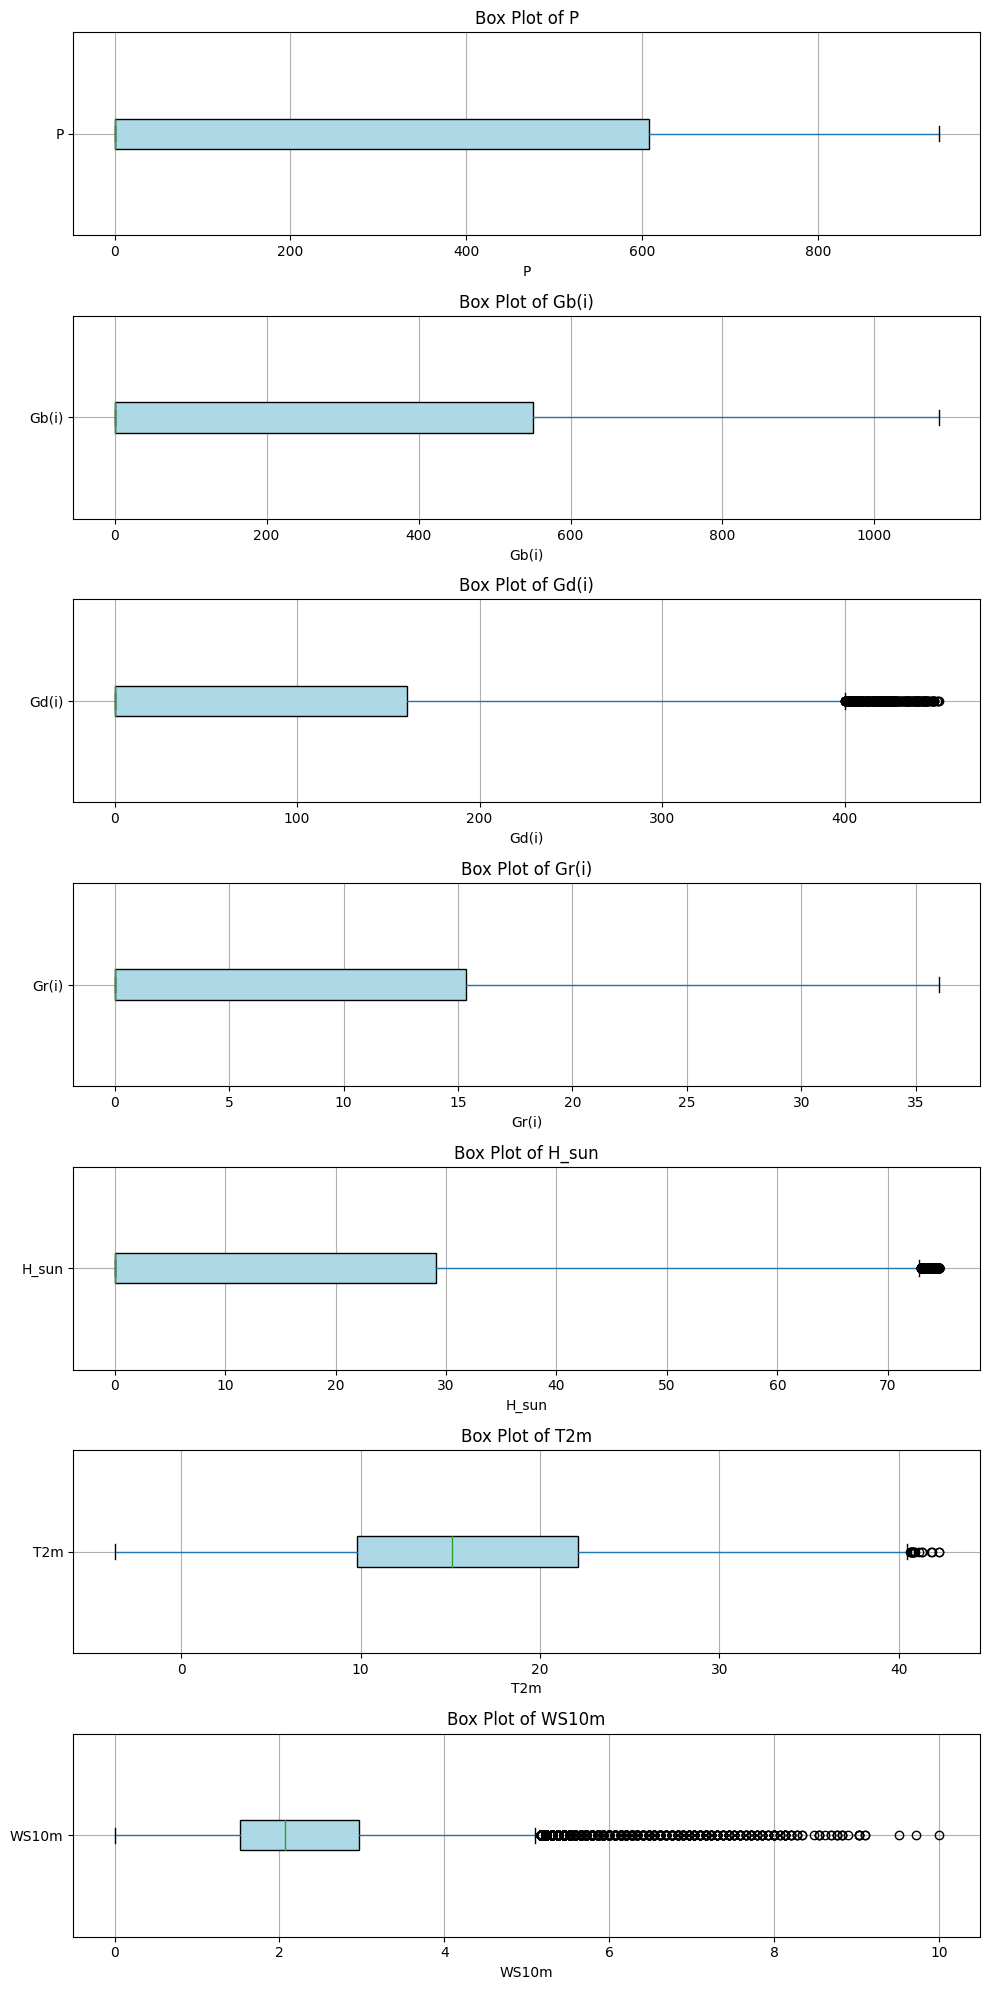

In [ ]:
# Set up the figure and axis
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 20))

# Plot box plots for each variable
#... continue

plt.show()

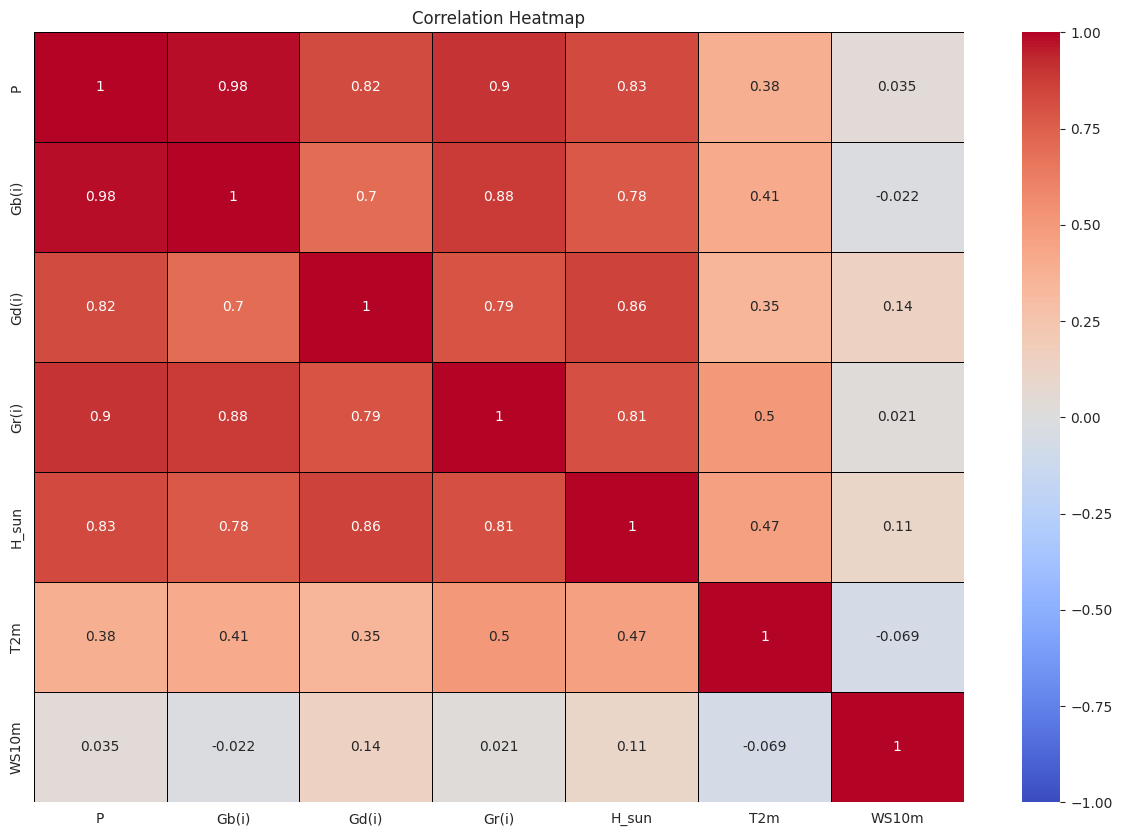

In [14]:
import seaborn as sns

# Selecting variables for correlation analysis
selected_features = ['P', 'Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']

# Compute the correlation matrix
#... continue

plt.show()

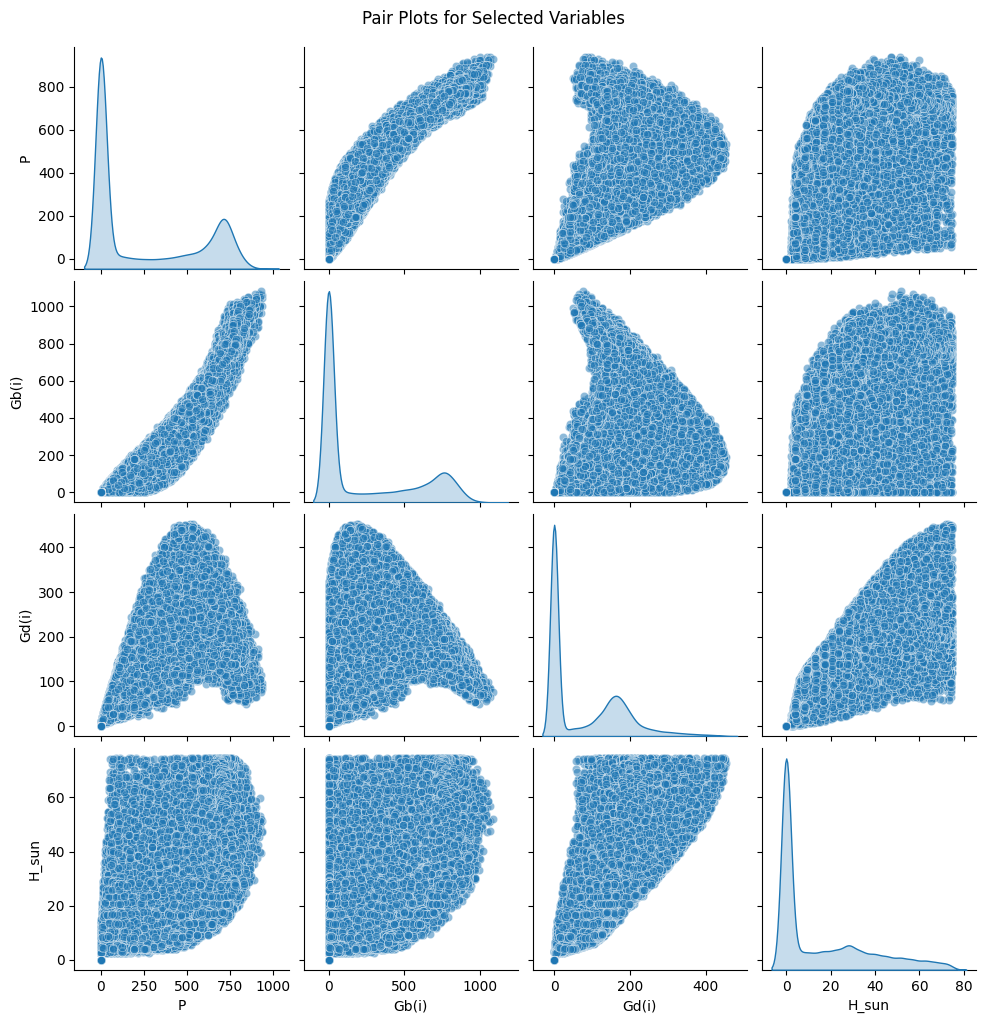

In [ ]:
# Selecting variables for pair plots
pairplot_vars = ['P', 'Gb(i)', 'Gd(i)', 'H_sun']

# Create the pair plots
#... continue

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
#... continue

adf_statistic, p_value, critical_values

(-19.475066330117993,
 0.0,
 {'1%': -3.430432939273607,
  '5%': -2.861576657751156,
  '10%': -2.566789511657082})

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality on the sampled data
#... continue

shapiro_statistic, shapiro_p_value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.12099993228912354, 0.0)

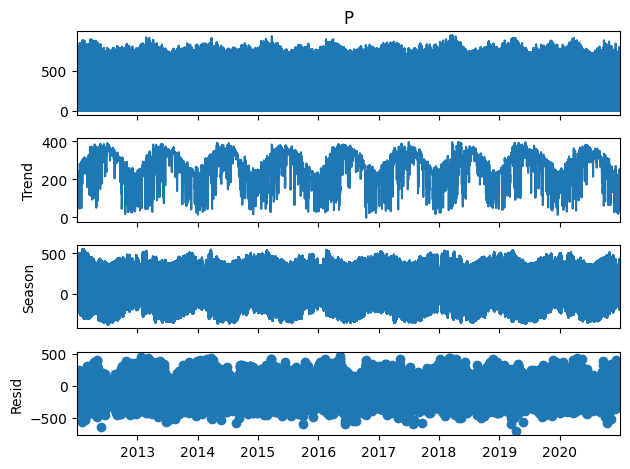

In [ ]:
from statsmodels.tsa.seasonal import STL

# Performing STL Decomposition on 'P' to check for seasonality
#... continue

plt.show()

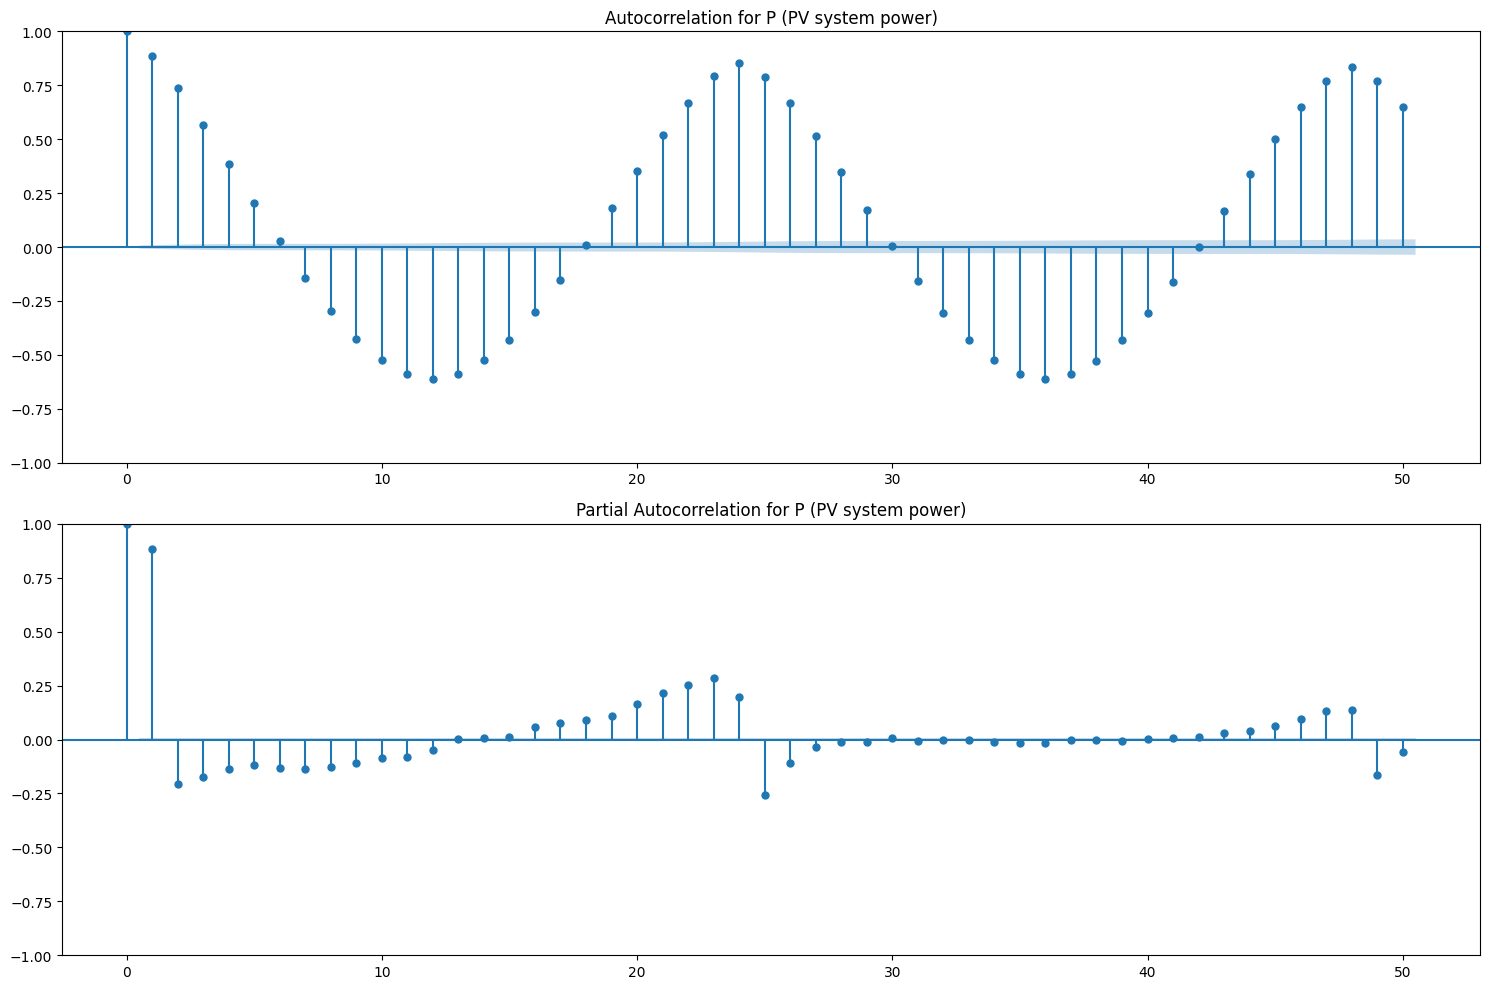

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation plots for the 'P' series in df_filtered
#... continue

# Plot Autocorrelation for 'P'
#... continue

plt.show()

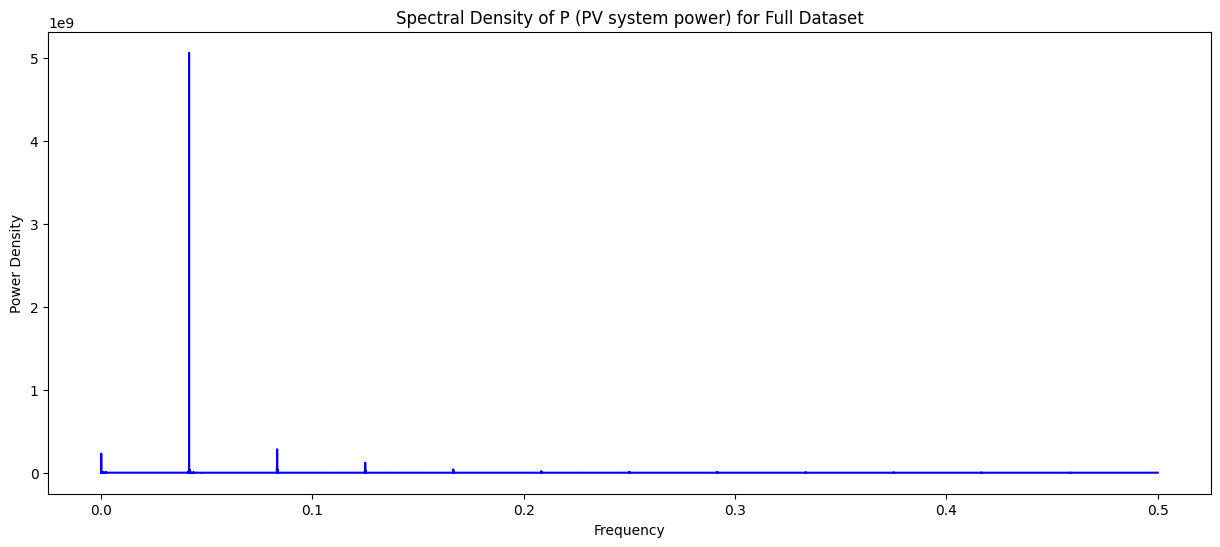

In [ ]:
from scipy.signal import periodogram

# Perform the spectral analysis using periodogram for the 'P' series in df_filtered
#... continue

plt.show()

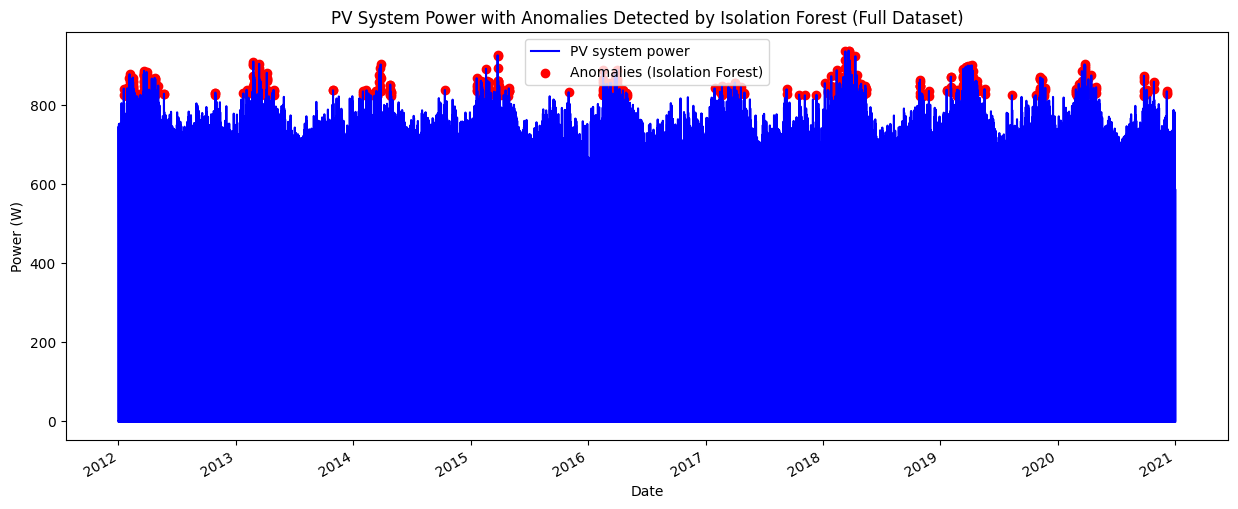

783

In [ ]:
from scipy.stats import zscore

# Create and fit an Isolation Forest model for the full 'P' series
#... continue

# Plot the 'P' series for the full df_filtered dataset and highlight anomalies detected by Isolation Forest
#... continue

# Return the number of detected anomalies using Isolation Forest for the full dataset
len(anomalies_iso_forest_full)

In [ ]:
# Calculate the percentage of anomalies in the 'P' series
#... continue

# Identify in which features the anomalies occur
#... continue

anomaly_percentage, unique_anomaly_features.tolist()

(0.9922445255474452, [])

In [ ]:
# Compute the median of the 'P' series
#... continue

anomalies_after_imputation.unique()

array([0.])

# Train-Validation-Test Splits

In [ ]:
# Split the data into train, validation, and test sets
#... continue

# Verify the splits
train.shape, validation.shape, test.shape

((52608, 35), (17520, 35), (8784, 35))

# Model building and Evaluation

## XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Prepare the data for XGBoost
#... continue

# Initialize and train the XGBoost model
#... continue

# Calculate the evaluation metrics on the validation set
#... continue

# Cross-validation on the training set
#... continue

mae, mse, rmse, r2, cross_val_rmse.mean(), cross_val_rmse.std()

(10.31827148780211,
 2620.5075531219272,
 51.190893263567176,
 0.9720672756117142,
 40.712347067334484,
 4.88854332064758)

In [ ]:
# Get feature importances for XGBoost
#... continue

# Sort the features based on importance
sorted_feature_importances_xgb = sorted(feature_importances_xgb, key=lambda x: x[1], reverse=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
#... continue

# Calculate the evaluation metrics on the validation set for Random Forest
#... continue

mae_rf, mse_rf, rmse_rf, r2_rf, cross_val_rmse_rf.mean(), cross_val_rmse_rf.std()

(9.813181255707761,
 2751.042060467334,
 52.450377124166934,
 0.9706758717165046,
 39.4335056668153,
 4.228857163514571)

In [ ]:
# Get feature importances for Random Forest
#... continue

# Sort the features based on importance
sorted_feature_importances_rf = sorted(feature_importances_rf, key=lambda x: x[1], reverse=True)

## Univariate LSTM Model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Extract the 'P' values for univariate forecasting
#... continue

# Define a function to create the LSTM dataset
#... continue

# Split data into training and test sets (80% train, 20% test)
#... continue

X_train.shape, X_test.shape

((63126, 1, 3), (15782, 1, 3))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
#... continue

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
63126/63126 [==============================] - 215s 3ms/step - loss: 0.0356 - val_loss: 0.0371
Epoch 2/20
63126/63126 [==============================] - 197s 3ms/step - loss: 0.0329 - val_loss: 0.0333
Epoch 3/20
63126/63126 [==============================] - 216s 3ms/step - loss: 0.0320 - val_loss: 0.0321
Epoch 4/20
63126/63126 [==============================] - 190s 3ms/step - loss: 0.0312 - val_loss: 0.0345
Epoch 5/20
63126/63126 [==============================] - 210s 3ms/step - loss: 0.0307 - val_loss: 0.0317
Epoch 6/20
63126/63126 [==============================] - 206s 3ms/step - loss: 0.0304 - val_loss: 0.0311
Epoch 7/20
63126/63126 [==============================] - 193s 3ms/step - loss: 0.0302 - val_loss: 0.0311
Epoch 8/20
63126/63126 [==============================] - 210s 3ms/step - loss: 0.0301 - val_loss: 0.0311
Epoch 9/20
63126/63126 [==============================] - 213s 3ms/step - loss: 0.0300 - val_loss: 0.0311
Epoch 10/20
63126/63126 [=====================

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

494/494 [==============================] - 1s 2ms/step


## Multivariate LSTM Model:

In [ ]:
# Extract features for multivariate forecasting
#... continue

# Define a function to create the LSTM dataset for multivariate data
#... continue

# Use a look_back of 3 hours (3 data points) to predict the next hour
#... continue

# Split data into training and test sets
#... continue

X_train_multivariate.shape, X_test_multivariate.shape

((63126, 3, 35), (15782, 3, 35))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model for multivariate data
#... continue

In [ ]:
model_multivariate.fit(X_train_multivariate, Y_train_multivariate, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_multivariate, Y_test_multivariate))

Epoch 1/20
1973/1973 [==============================] - 15s 7ms/step - loss: 0.0225 - val_loss: 0.0206
Epoch 2/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0166 - val_loss: 0.0161
Epoch 3/20
1973/1973 [==============================] - 10s 5ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 4/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0143 - val_loss: 0.0152
Epoch 5/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0138 - val_loss: 0.0143
Epoch 6/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0136 - val_loss: 0.0140
Epoch 7/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0132 - val_loss: 0.0157
Epoch 8/20
1973/1973 [==============================] - 12s 6ms/step - loss: 0.0129 - val_loss: 0.0137
Epoch 9/20
1973/1973 [==============================] - 13s 6ms/step - loss: 0.0128 - val_loss: 0.0134
Epoch 10/20
1973/1973 [==============================] - 14s 7ms/step - l

In [ ]:
train_predict_multivariate = model_multivariate.predict(X_train_multivariate)
test_predict_multivariate = model_multivariate.predict(X_test_multivariate)

494/494 [==============================] - 1s 3ms/step


## Evaluation metrics for both univariate and multivariate LSTM models:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Define a function to compute the metrics
#... continue

# Compute metrics for univariate LSTM
#... continue

# Compute metrics for multivariate LSTM
#... continue

Univariate LSTM Metrics:
{'MAE': 79.97260563633735, 'MSE': 19702.44481596607, 'RMSE': 140.36539750225506, 'R2': 0.7898586172585809}

Multivariate LSTM Metrics:
{'MAE': 39.58624147363514, 'MSE': 7766.685941317465, 'RMSE': 88.1288031310846, 'R2': 0.9171624568284946}


## Data Preparation for Prophet

In [ ]:
import pandas as pd

# Preparing data for Prophet
#... continue

# Display the prepared data
prophet_data.head()

,ds,y
0,2012-01-01 00:10:00,0.0
1,2012-01-01 01:10:00,0.0
2,2012-01-01 02:10:00,0.0
3,2012-01-01 03:10:00,0.0
4,2012-01-01 04:10:00,0.0


In [ ]:
from prophet import Prophet

# Initialize and fit the model
#... continue

In [ ]:
# Make future dataframe for predictions (e.g., for next 365 days/hours)
#... continue

In [ ]:
# For univariate:
#... continue

In [ ]:
metrics_univariate_prophet

{'MAE': 118.70477607062189,
 'MSE': 24962.985448941694,
 'RMSE': 157.99678936276425,
 'R2': 0.7287654683249964}

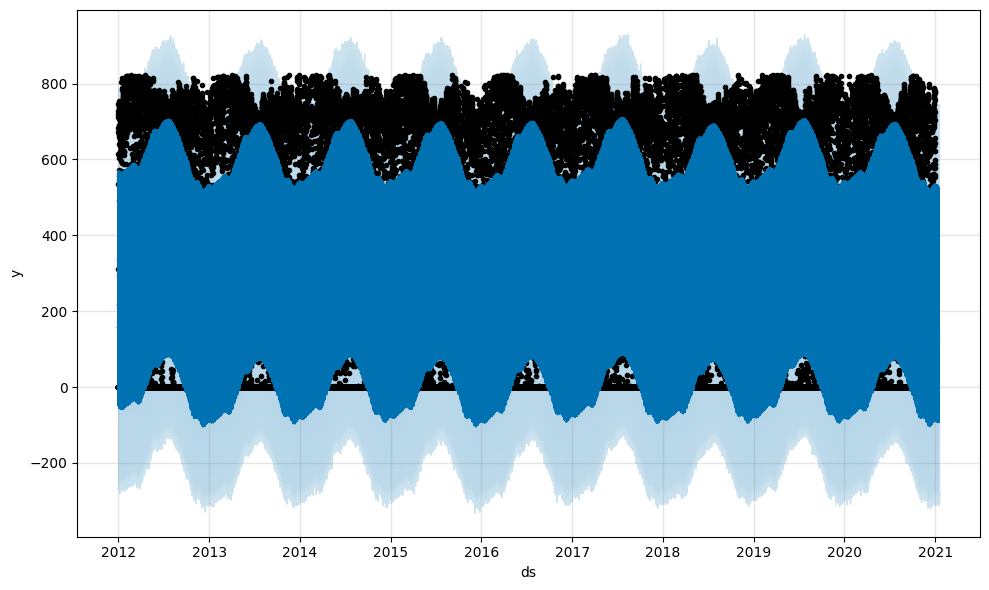

In [ ]:
#... continue

## Multivariate Forecasting with Prophet

In [ ]:
from prophet import Prophet

# Initialize the model
#... continue

# Add additional regressors
#... continue

# Fit the model
#... continue

In [ ]:
# For multivariate:
#... continue

In [ ]:
# Make future dataframe for predictions
#... continue

In [ ]:
metrics_multivariate_prophet

{'MAE': 270.34378717210393,
 'MSE': 147931.11184023364,
 'RMSE': 384.6181376901428,
 'R2': -0.6073408335800394}

## Quantile Regression

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# Fit the Quantile Regression model for the median (0.5 quantile)
#... continue

# Summary of the quantile regression model
print(quantile_reg.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      P   Pseudo R-squared:               0.9565
Model:                       QuantReg   Bandwidth:                   2.896e-07
Method:                 Least Squares   Sparsity:                    4.493e-06
Date:                Thu, 02 Nov 2023   No. Observations:                52608
Time:                        11:42:18   Df Residuals:                    52604
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.389e-06   2.15e-08     64.745      0.000    1.35e-06    1.43e-06
Gb_i           0.7728   4.41e-11   1.75e+10      0.000       0.773       0.773
Gd_i           0.8531   1.41e-10   6.04e+09      0.000       0.853       0.853
T2m        -1.066e-07   1.28e-09    -83.356      0.0

In [ ]:
# Predicting on the validation set using the renamed dataset
#... continue

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#... continue

print(f"Validation MAE: {mae_val}, Validation RMSE: {rmse_val}")
print(f"Test MAE: {mae_test}, Test RMSE: {rmse_test}")

Validation MAE: 11.286496842481712, Validation RMSE: 20.936648037844883
Test MAE: 10.636474358718527, Test RMSE: 19.98080249680937


## ARIMA/SARIMA:

In [ ]:
from statsmodels.tsa.stattools import adfuller

#... continue

ADF Statistic: -15.966010463437007
p-value: 7.090864418035875e-29


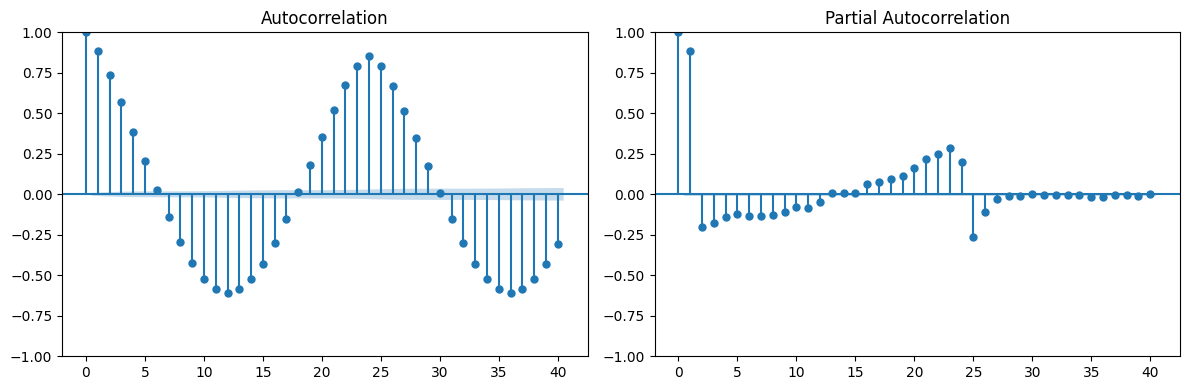

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#... continue

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#... continue

mae, mse, rmse, r2